### Setting Environment

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!ls

data				kaggle.json			     test
Grapevine_Leaves_Image_Dataset	skin-cancer-malignant-vs-benign.zip  train


## skin-cancer Dataset

### Extraction and Unzipping Dataset from Kaggle

In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign --unzip --force

 95% 309M/325M [00:10<00:00, 105MB/s] 
100% 325M/325M [00:10<00:00, 33.0MB/s]
User cancelled operation


### Load and Check Images

In [ ]:
## Load and Check Images
from tensorflow.keras.utils import load_img

### Show an Image

In [ ]:
img = load_img("/content/drive/MyDrive/kaggle/train/benign/100.jpg")

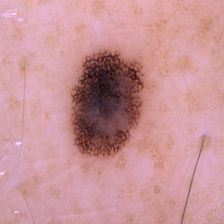

In [ ]:
img

### To extract dataset from directory

In [ ]:
from tensorflow.keras.utils  import image_dataset_from_directory

### Setting Train and Test Path

In [ ]:

train_path = "/content/drive/MyDrive/kaggle/train"
test_path =  "/content/drive/MyDrive/kaggle/test"

### Read the train and TEst Dataset using load image directory

In [ ]:

train_dataset= image_dataset_from_directory(train_path, label_mode = "categorical", image_size = (228,228), batch_size = 32)
test_dataset= image_dataset_from_directory(test_path, label_mode = "categorical", image_size = (228,228), batch_size = 32)

Found 2637 files belonging to 2 classes.
Found 660 files belonging to 2 classes.


In [ ]:
class_names = train_dataset.class_names
class_names

['benign', 'malignant']

In [ ]:
### Importing the model
from tensorflow.keras.models import Sequential

In [ ]:
from keras.api._v2.keras import layers
## importing the layer
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import layers

In [ ]:
from keras.src.layers.convolutional.conv2d_transpose import Conv2D
model = Sequential(
)
model.add(layers.Conv2D(32, (3,3), input_shape = (228,228,3), activation= "relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation= "relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation= "relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(256, (3,3), activation= "relu"))
model.add(layers.MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 113, 113, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from keras.src.mixed_precision.loss_scale_optimizer import optimizer
## Compile the model
model.compile(loss= 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(0.001),
              )

In [ ]:
## Fitting the model
history = model.fit(train_dataset, validation_data= test_dataset, epochs=30) #steps_per_epoch=5

Epoch 1/30
83/83 [==============================] - 10s 107ms/step - loss: 0.7172 - val_loss: 0.6913
Epoch 2/30
83/83 [==============================] - 10s 118ms/step - loss: 0.6910 - val_loss: 0.6907
Epoch 3/30
83/83 [==============================] - 10s 116ms/step - loss: 0.6903 - val_loss: 0.6901
Epoch 4/30
83/83 [==============================] - 9s 99ms/step - loss: 0.6898 - val_loss: 0.6896
Epoch 5/30
83/83 [==============================] - 10s 114ms/step - loss: 0.6895 - val_loss: 0.6894
Epoch 6/30
83/83 [==============================] - 10s 117ms/step - loss: 0.6893 - val_loss: 0.6892
Epoch 7/30
83/83 [==============================] - 9s 98ms/step - loss: 0.6891 - val_loss: 0.6892
Epoch 8/30
83/83 [==============================] - 10s 113ms/step - loss: 0.6891 - val_loss: 0.6891
Epoch 9/30
83/83 [==============================] - 10s 118ms/step - loss: 0.6890 - val_loss: 0.6891
Epoch 10/30
83/83 [==============================] - 10s 110ms/step - loss: 0.6890 - val_loss: 

In [ ]:
### Apply Pre-Trained Model VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
pretrained_model = VGG16(include_top = False,
                         input_shape = (228,228,3),
                         weights = "imagenet",
                         pooling = "max",
                         )

In [ ]:
for layers in pretrained_model.layers:
  layers.trainable = False
pre_model = Sequential()
pre_model.add(pretrained_model)
pre_model.add(Flatten())
pre_model.add(Dense(64, activation = 'relu'))
pre_model.add(Dense(2, activation = 'softmax'))

In [ ]:
## Compile the pretrained_model
pre_model.compile(loss= 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(0.001),
              metrics = ["accuracy"]
              )

In [ ]:
## Fitting the pretrianed_model
history_pretrained_model = pre_model.fit(train_dataset, validation_data= test_dataset,  epochs=30) #steps_per_epoch=20,

Epoch 1/30
83/83 [==============================] - 16s 179ms/step - loss: 0.4343 - accuracy: 0.8597 - val_loss: 0.9226 - val_accuracy: 0.7818
Epoch 2/30
83/83 [==============================] - 15s 180ms/step - loss: 0.3433 - accuracy: 0.8821 - val_loss: 0.8057 - val_accuracy: 0.7864
Epoch 3/30
83/83 [==============================] - 17s 203ms/step - loss: 0.2696 - accuracy: 0.8991 - val_loss: 0.8697 - val_accuracy: 0.8076
Epoch 4/30
83/83 [==============================] - 15s 177ms/step - loss: 0.2153 - accuracy: 0.9196 - val_loss: 0.6980 - val_accuracy: 0.8061
Epoch 5/30
83/83 [==============================] - 18s 205ms/step - loss: 0.1709 - accuracy: 0.9378 - val_loss: 0.6765 - val_accuracy: 0.8303
Epoch 6/30
83/83 [==============================] - 16s 181ms/step - loss: 0.1317 - accuracy: 0.9515 - val_loss: 0.7307 - val_accuracy: 0.8167
Epoch 7/30
83/83 [==============================] - 17s 202ms/step - loss: 0.1166 - accuracy: 0.9583 - val_loss: 0.7309 - val_accuracy: 0.8076

### Apply Pre-Trained Model RESNET50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
pretrained_model_RESNET50 = ResNet50(include_top = False,
                         input_shape = (228,228,3),
                         weights = "imagenet",
                         pooling = "max",
                         )

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layers in pretrained_model.layers:
  layers.trainable = False
pre_model_ResNet50 = Sequential()
pre_model_ResNet50.add(pretrained_model_RESNET50)
pre_model_ResNet50.add(Flatten())
pre_model_ResNet50.add(Dense(64, activation = 'relu'))
pre_model_ResNet50.add(Dense(2, activation = 'softmax'))

In [ ]:
## Compile the pretrained_model
pre_model_ResNet50.compile(loss= 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(0.001),
              metrics = ["accuracy"]
              )

### Fitting the pretrianed_model RESNET-50

In [ ]:
history_pretrained_model_ResNet50 = pre_model_ResNet50.fit(train_dataset, validation_data= test_dataset,  epochs=30) #steps_per_epoch=20,

Epoch 1/30
83/83 [==============================] - 70s 444ms/step - loss: 1.2003 - accuracy: 0.7531 - val_loss: 8.7465 - val_accuracy: 0.5500
Epoch 2/30
83/83 [==============================] - 32s 374ms/step - loss: 0.5601 - accuracy: 0.7554 - val_loss: 114.0428 - val_accuracy: 0.5485
Epoch 3/30
83/83 [==============================] - 32s 374ms/step - loss: 0.4527 - accuracy: 0.7907 - val_loss: 2.4383 - val_accuracy: 0.4712
Epoch 4/30
83/83 [==============================] - 32s 381ms/step - loss: 0.4135 - accuracy: 0.7945 - val_loss: 0.5620 - val_accuracy: 0.7864
Epoch 5/30
83/83 [==============================] - 34s 404ms/step - loss: 0.4279 - accuracy: 0.8089 - val_loss: 5.3919 - val_accuracy: 0.3758
Epoch 6/30
83/83 [==============================] - 32s 374ms/step - loss: 0.3668 - accuracy: 0.8229 - val_loss: 1.5643 - val_accuracy: 0.4909
Epoch 7/30
83/83 [==============================] - 34s 403ms/step - loss: 0.3545 - accuracy: 0.8366 - val_loss: 2.4043 - val_accuracy: 0.74

## INTEL Dataset

### Multiclassification INTELClassification

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification --unzip --force

 99% 342M/346M [00:02<00:00, 193MB/s]
100% 346M/346M [00:02<00:00, 155MB/s]


In [115]:
train_dir = "/content/drive/MyDrive/kaggle/seg_train/seg_train"

In [116]:
validation_dir = "/content/drive/MyDrive/kaggle/seg_test/seg_test"

In [117]:
test_dir =  "/content/drive/MyDrive/kaggle/seg_pred/seg_pred"

In [128]:
train_dataset_intel = image_dataset_from_directory(train_dir, label_mode = "categorical", image_size = (228,228), batch_size=32)
test_dataset_intel = image_dataset_from_directory(validation_dir, label_mode = "categorical", image_size = (228,228), batch_size=32)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [129]:
class_names = train_dataset_intel.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [130]:
class_names = test_dataset_intel.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [137]:
model_intelDataset=Sequential()

In [138]:
pretrained_model=keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(228,228,3),
    pooling='avg',
)

In [139]:
for layers in pretrained_model.layers:
  layers.trainable=False
model_intelDataset.add(pretrained_model)
model_intelDataset.add(Flatten())
model_intelDataset.add(Dense(64, activation='relu'))
model_intelDataset.add(Dense(6,activation='softmax'))

In [140]:
model_intelDataset.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
 metrics=["accuracy"])

In [141]:
history=model_intelDataset.fit(
    train_dataset_intel,
    validation_data=test_dataset_intel,
    epochs=30
)

Epoch 1/30
439/439 [==============================] - 85s 186ms/step - loss: 0.1488 - accuracy: 0.8460 - val_loss: 0.1201 - val_accuracy: 0.8773
Epoch 2/30
439/439 [==============================] - 75s 169ms/step - loss: 0.0909 - accuracy: 0.9037 - val_loss: 0.1039 - val_accuracy: 0.8910
Epoch 3/30
439/439 [==============================] - 75s 169ms/step - loss: 0.0772 - accuracy: 0.9183 - val_loss: 0.0982 - val_accuracy: 0.9003
Epoch 4/30
439/439 [==============================] - 75s 169ms/step - loss: 0.0690 - accuracy: 0.9263 - val_loss: 0.0982 - val_accuracy: 0.9023
Epoch 5/30
439/439 [==============================] - 74s 169ms/step - loss: 0.0621 - accuracy: 0.9334 - val_loss: 0.1003 - val_accuracy: 0.9040
Epoch 6/30
439/439 [==============================] - 74s 169ms/step - loss: 0.0560 - accuracy: 0.9414 - val_loss: 0.1043 - val_accuracy: 0.9087
Epoch 7/30
439/439 [==============================] - 74s 169ms/step - loss: 0.0499 - accuracy: 0.9490 - val_loss: 0.1047 - val_ac

In [143]:
test_loss, test_acc = model_intelDataset.evaluate(test_dataset_intel)
print(f"Test accuracy: {test_acc:.3f}")

94/94 [==============================] - 13s 135ms/step - loss: 0.2893 - accuracy: 0.8940
Test accuracy: 0.894


## MultiClassifcation Bird DAtaset

### Creating the Model on MultiClassifcation Bird DAtaset

In [ ]:
## Checking the Kaggle Directory
!ls

data				kaggle.json			     test
Grapevine_Leaves_Image_Dataset	skin-cancer-malignant-vs-benign.zip  train


### Extraction and Unzip the bird Dataset from Kaggle

In [ ]:
!kaggle datasets download -d imbikramsaha/drone-bird-classification --unzip --force

 77% 31.0M/40.0M [00:00<00:00, 104MB/s] 
100% 40.0M/40.0M [00:00<00:00, 88.9MB/s]


### Load and Check the images

In [ ]:
from tensorflow.keras.utils import load_img

In [ ]:
bird_image = load_img("/content/drive/MyDrive/kaggle/drone_or_bird/birds/0628debe-4429-4d78-b4ad-30f5e951841c.jpg")

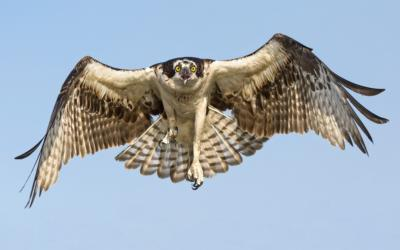

In [ ]:
bird_image

### Set the path to fetch traing and test dataset

In [ ]:
## Import the path Library

In [ ]:
path=('/content/drive/MyDrive/kaggle/drone_or_bird')

### Spliting the Dataset into Training and Testing

In [ ]:
## Import the libaries
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
train_dataset_b_d = image_dataset_from_directory(path,validation_split=0.2,subset="training" ,seed=123,label_mode='categorical',image_size=(228, 228), batch_size=32)
validation_data_b_d = image_dataset_from_directory(path,validation_split=0.2,subset="validation" ,seed=123,label_mode='categorical',image_size=(228, 228), batch_size=32)

Found 329 files belonging to 2 classes.
Using 264 files for training.
Found 329 files belonging to 2 classes.
Using 65 files for validation.


In [ ]:
train_dataset_b_d

<_BatchDataset element_spec=(TensorSpec(shape=(None, 228, 228, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
class_names=train_dataset.class_names
class_names

['birds', 'drones']

### DAta Augmentation

In [ ]:
## import the library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(228, 228),
    batch_size=32,
    class_mode='binary')

Found 326 images belonging to 2 classes.


### Build the Model

In [ ]:
## working on above built model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 113, 113, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(0.001),
              metrics = "[accuracy]"
              )

In [ ]:
## Fitting the model
history=model.fit(
    train_dataset_b_d,
    validation_data=validation_data_b_d,
    epochs=30
)